In [3]:
import pandas as pd
import numpy as np
from random import choice, randint
from datetime import datetime, timedelta

# 生成数据
np.random.seed(0)

# 定义数据生成函数
def generate_data(num_records):
    # 生成编号
    ids = np.arange(1, num_records + 1)
    
    # 生成日期
    start_date = datetime.now() - timedelta(days=num_records * 2)  # 从当前时间向前计算
    dates = [start_date + timedelta(days=2 * i) for i in range(num_records)]
    
    # 分析类型
    analysis_types = ['预测未来曲线', '失稳判别']
    analysis_type_values = [choice(analysis_types) for _ in range(num_records)]
    
    # 分析结果
    analysis_results = ['空', '稳定', '不稳定']
    # analysis_result_values = [choice(analysis_results) if at == '失稳判别' else '' for at in analysis_type_values]
    analysis_result_values = [choice(analysis_results) for _ in range(num_records)]
    
    # ood类型
    ood_types = ['是', '否']
    ood_type_values = [choice(ood_types) for _ in range(num_records)]
    
    # 备注
    notes = ['数据完整', '需重新分析', '分析中', '等待数据', '确认结果']
    note_values = [choice(notes) for _ in range(num_records)]
    
    # 整合成 DataFrame
    data = pd.DataFrame({
        '编号': ids,
        '日期': dates,
        '分析类型': analysis_type_values,
        '分析结果': analysis_result_values,
        'ood类型': ood_type_values,
        '备注': note_values
    })
    
    return data

# 生成数据
data_frame = generate_data(50)

# 保存为 CSV 文件
csv_path = "./data/historyloggerdata.csv"
data_frame.to_csv(csv_path, index=False)
csv_path


'./data/historyloggerdata.csv'

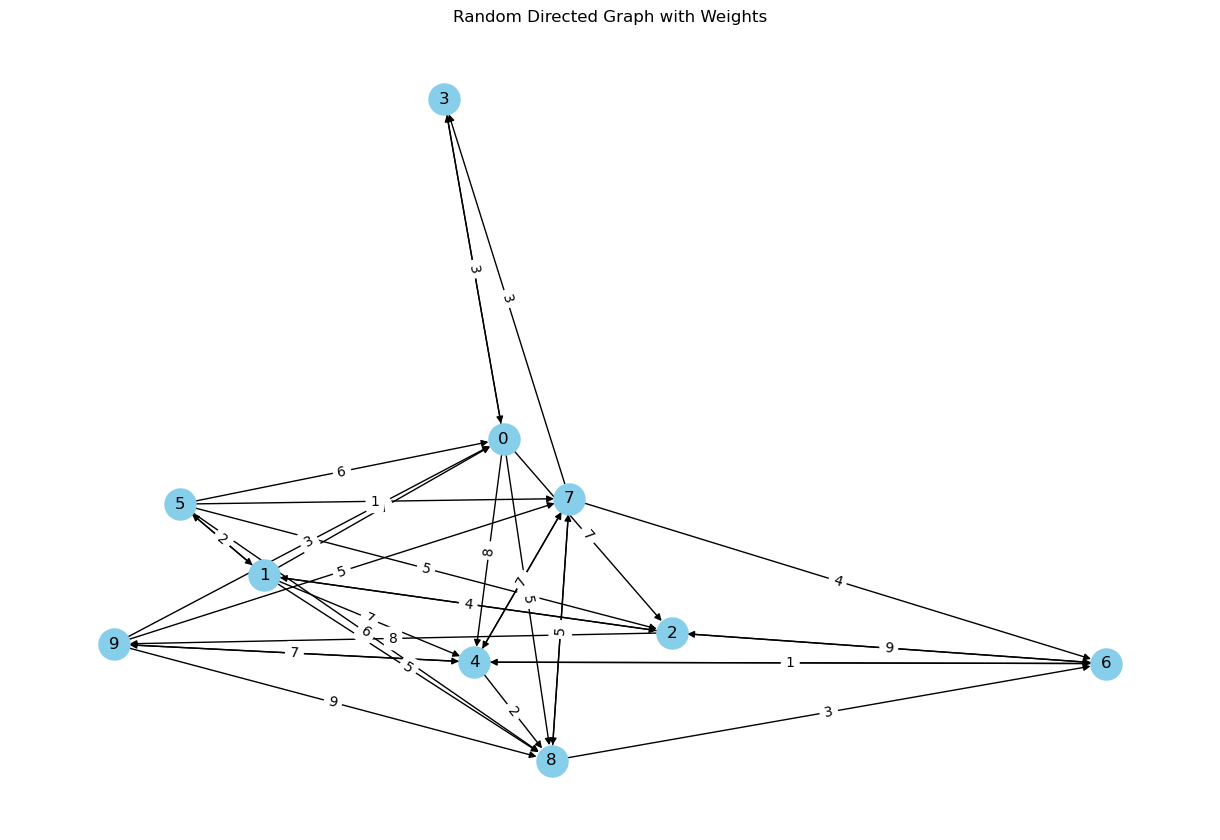

(NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}),
 OutEdgeDataView([(0, 2, {'weight': 7}), (0, 3, {'weight': 4}), (0, 4, {'weight': 8}), (0, 8, {'weight': 5}), (1, 0, {'weight': 7}), (1, 2, {'weight': 3}), (1, 4, {'weight': 7}), (1, 5, {'weight': 8}), (1, 8, {'weight': 5}), (2, 1, {'weight': 4}), (2, 6, {'weight': 8}), (2, 9, {'weight': 8}), (3, 0, {'weight': 3}), (4, 6, {'weight': 6}), (4, 7, {'weight': 5}), (4, 8, {'weight': 2}), (4, 9, {'weight': 8}), (5, 0, {'weight': 6}), (5, 1, {'weight': 2}), (5, 2, {'weight': 5}), (5, 7, {'weight': 1}), (5, 8, {'weight': 6}), (6, 2, {'weight': 9}), (6, 4, {'weight': 1}), (7, 3, {'weight': 3}), (7, 4, {'weight': 7}), (7, 6, {'weight': 4}), (7, 8, {'weight': 9}), (8, 6, {'weight': 3}), (8, 7, {'weight': 5}), (9, 0, {'weight': 3}), (9, 4, {'weight': 7}), (9, 7, {'weight': 5}), (9, 8, {'weight': 9})]))

In [3]:
# 拓扑图
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 生成随机图数据
np.random.seed(42)
num_nodes = 10
num_edges = 15

# 创建有向图
G = nx.gnp_random_graph(num_nodes, 0.3, seed=42, directed=True)

# 添加随机权重
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = np.random.randint(1, 10)

# 生成图形
pos = nx.spring_layout(G)  # 使用Spring布局
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, arrowstyle='-|>', arrowsize=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Random Directed Graph with Weights")
plt.show()

# 返回图中的节点和边信息以及权重
G.nodes(data=True), G.edges(data=True)



In [47]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import networkx as nx
import math

# 创建图
G = nx.gnp_random_graph(10, 0.5, directed=True)

# 给节点添加额外信息
for node in G.nodes:
    G.nodes[node]['voltage'] = f"{100 + node*5}V"  # 示例电压值
    G.nodes[node]['angle'] = f"{node*10}°"  # 示例功角

# 给边添加长度信息
for edge in G.edges():
    G.edges[edge]['length'] = f"{edge[0] * edge[1] * 0.1:.2f} km"  # 示例边的长度

# 手动计算网格位置
node_list = list(G.nodes())
grid_size = int(math.sqrt(len(node_list))) + 1  # 计算网格大小
pos = {node: (node % grid_size, -node // grid_size) for node in node_list}
# pos = nx.grid_layout(G)

# 创建边和箭头的位置信息
edge_x = []
edge_y = []
arrow_x = []
arrow_y = []
edge_hover_text = []  # 存储边的悬停文本信息
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_hover_text.extend([f"Length: {G.edges[edge]['length']}", "", None])

    # 计算箭头位置，略微调整箭头的位置使其不完全重叠在边上
    arrow_x.extend([0.95 * x1 + 0.05 * x0, x1, None])
    arrow_y.extend([0.95 * y1 + 0.05 * y0, y1, None])

# 创建节点的位置信息
node_x = [pos[node][0] for node in G.nodes]
node_y = [pos[node][1] for node in G.nodes]

# 创建边的图形对象
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2, color='black'),  # 黑色线条
    mode='lines',
    hoverinfo='text',
    text=edge_hover_text)

# 创建箭头的图形对象
arrow_trace = go.Scatter(
    x=arrow_x, y=arrow_y,
    line=dict(width=1, color='black'),
    hoverinfo='none',
    mode='markers',
    marker=dict(
        size=16,  # 增加箭头大小
        color='black',
        symbol='triangle-left'  # 这是最接近的形状，可选其他形状
    )
)

# 创建节点的图形对象
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=[f"Node {node}" for node in G.nodes],  # 默认显示的文本
    hovertext=[f"Voltage: {G.nodes[node]['voltage']}<br>Angle: {G.nodes[node]['angle']}" for node in G.nodes],
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        size=10,
        color=list(G.degree),
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2),
    textposition="top center",
    textfont=dict(
        family="Arial",
        size=12,
        color="blue")  # 设置文本颜色为深红色
)

fig = go.Figure(data=[edge_trace, arrow_trace, node_trace],
             layout=go.Layout(
                title='Interactive Network Graph Made with Plotly',
                showlegend=False,
                hovermode='closest',
                width=800,
                height=800,
                margin=dict(b=0,l=0,r=0,t=0),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()


In [25]:
import plotly.graph_objects as go
import networkx as nx

# 创建图
G = nx.gnp_random_graph(10, 0.5, directed=True)

# 给节点添加额外信息
for node in G.nodes:
    G.nodes[node]['voltage'] = f"{100 + node*5}V"  # 示例电压值
    G.nodes[node]['angle'] = f"{node*10}°"  # 示例功角

# 给边添加长度信息
for edge in G.edges():
    G.edges[edge]['length'] = f"{edge[0] * edge[1] * 0.1:.2f} km"  # 示例边的长度

pos = nx.spring_layout(G)

# 创建边和箭头的位置信息
edge_x = []
edge_y = []
arrow_x = []
arrow_y = []
edge_hover_text = []  # 存储边的悬停文本信息
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_hover_text.extend([f"Length: {G.edges[edge]['length']}", "", None])

    # 计算箭头位置，略微调整箭头的位置使其不完全重叠在边上
    arrow_x.extend([0.95 * x1 + 0.05 * x0, x1, None])
    arrow_y.extend([0.95 * y1 + 0.05 * y0, y1, None])

# 创建节点的位置信息
node_x = [pos[node][0] for node in G.nodes]
node_y = [pos[node][1] for node in G.nodes]

# 创建边的图形对象
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2, color='black'),  # 黑色线条
    mode='lines',
    hoverinfo='text',
    text=edge_hover_text)

# 创建箭头的图形对象
arrow_trace = go.Scatter(
    x=arrow_x, y=arrow_y,
    line=dict(width=0.5, color='black'),
    hoverinfo='none',
    mode='markers',
    marker=dict(size=8, color='black', symbol='triangle-left'))

# 创建节点的图形对象
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=[f"Node {node}" for node in G.nodes],  # 默认显示的文本
    hovertext=[f"Voltage: {G.nodes[node]['voltage']}<br>Angle: {G.nodes[node]['angle']}" for node in G.nodes],
    hoverinfo='text',
    marker=dict(
        size=10,
        color=list(G.degree),
        showscale=False,  # 关闭色彩条
        line_width=2),
    textposition="top center",
    textfont=dict(
        family="Arial",
        size=12,
        color="darkred")
)

fig = go.Figure(data=[edge_trace, arrow_trace, node_trace],
             layout=go.Layout(
                title='Interactive Network Graph Made with Plotly',
                showlegend=False,
                hovermode='closest',
                width=800,
                height=800,
                margin=dict(b=0,l=0,r=0,t=0),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()


In [46]:
%matplotlib notebook
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# 设置随机种子
np.random.seed(42)

# 生成一个有10个节点和15个边的随机图
num_nodes = 10
num_edges = 15
G = nx.gnp_random_graph(num_nodes, 0.3, seed=42, directed=True)

# 为每条边添加随机权重
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = np.random.randint(1, 10)

# 为节点添加功角(angle)和电压(voltage)属性
for n in G.nodes():
    G.nodes[n]['angle'] = np.random.uniform(0, 360)  # 功角，单位为度
    G.nodes[n]['voltage'] = np.random.uniform(0.9, 1.1)  # 电压，单位为pu

# 使用Spring布局
pos = nx.spring_layout(G)

# 绘图
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, arrowstyle='-|>', arrowsize=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Random Directed Graph with Weights")

# 添加交互功能：当鼠标移动到节点上时显示信息
def on_move(event):
    # 找到鼠标最近的点
    nearest_node = None
    min_dist = float('inf')
    for n, p in pos.items():
        dist = (event.xdata - p[0])**2 + (event.ydata - p[1])**2
        if dist < min_dist:
            nearest_node = n
            min_dist = dist
    
    # 如果找到节点，并且距离很近，则显示节点信息
    if nearest_node is not None and min_dist < 0.01:  # 调整阈值以适应节点大小和图形尺寸
        info = G.nodes[nearest_node]
        print(f"Node {nearest_node}: Angle = {info['angle']:.2f} degrees, Voltage = {info['voltage']:.2f} pu")
        plt.title(f"Node {nearest_node}: Angle = {info['angle']:.2f} degrees, Voltage = {info['voltage']:.2f} pu")
    else:
        plt.title("Random Directed Graph with Weights")

fig = plt.gcf()
fig.canvas.mpl_connect('motion_notify_event', on_move)

plt.show()


<IPython.core.display.Javascript object>